trainX shape: (7352, 4, 32, 9)
testX shape: (2947, 4, 32, 9)
trainy shape: (7352, 6)
testy shape: (2947, 6)


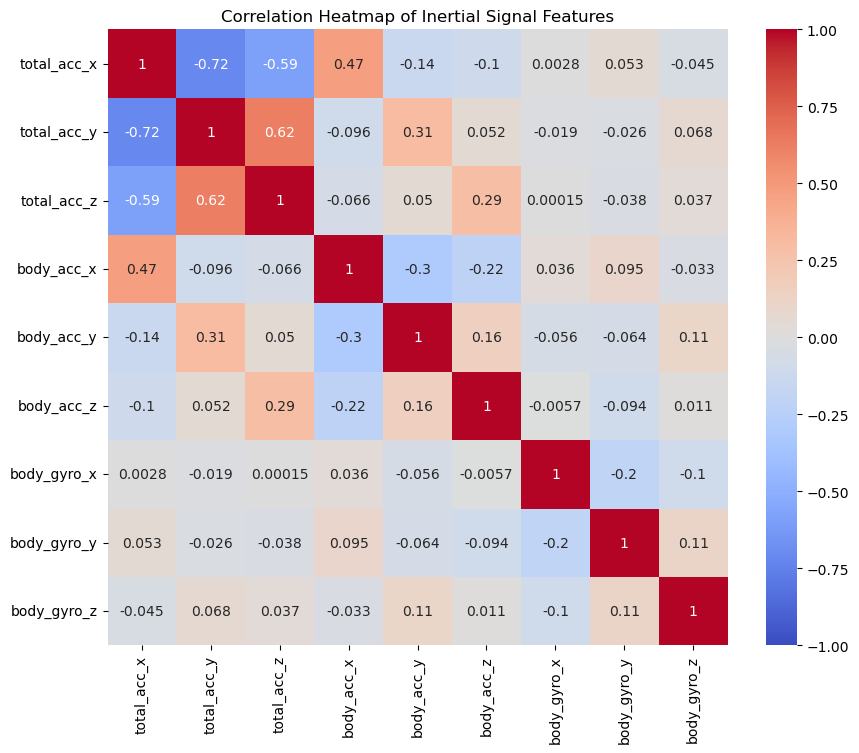

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_5 (TimeDistributed) │ (None, 4, 32, 128)          │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 4, 32, 128)          │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 4, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 4, 16, 64)           │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_9 (TimeDistributed) │ (None, 4, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_10                  │ (None, 4, 8, 64)            │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_11                  │ (None, 4, 512)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 999,622 (3.81 MB)

 Trainable params: 999,622 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5709 - loss: 0.9934 - val_accuracy: 0.8660 - val_loss: 0.4963
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9300 - loss: 0.1894 - val_accuracy: 0.8670 - val_loss: 0.4822
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9263 - loss: 0.1899 - val_accuracy: 0.8687 - val_loss: 0.4697
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9410 - loss: 0.1391 - val_accuracy: 0.8931 - val_loss: 0.3971
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9504 - loss: 0.1186 - val_accuracy: 0.8833 - val_loss: 0.5217
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9492 - loss: 0.1186 - val_accuracy: 0.9063 - val_loss: 0.4801
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9553 - loss: 0.1031 - val_accuracy: 0.9094 - val_loss: 0.4991
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9477 - loss: 0.1287 - val_accu

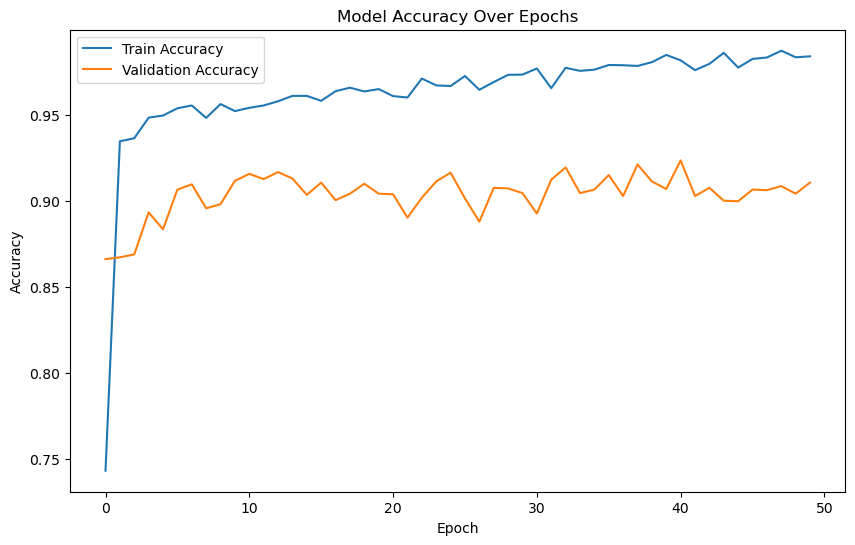

In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
from numpy import dstack
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

# Function to load a single file
def file_load(filepath):
    df = read_csv(filepath, header=None, sep=r'\s+')
    return df.values

# Function to stack data from multiple files into a 3D array
def train_test_append(filenames, append_before=''):
    datalist = [file_load(append_before + name) for name in filenames]
    return dstack(datalist)

# Function to load inertial signals and labels for train or test group
def inertial_signals_load(group, append_before=''):
    filepath = append_before + group + '/Inertial Signals/'
    filenames = [
        'total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt',
        'body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt',
        'body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt'
    ]
    X = train_test_append(filenames, filepath)
    y = file_load(append_before + group + '/y_' + group + '.txt')
    return X, y

# Function to load and preprocess the dataset
def load_dataset(dataset_path):
    if not dataset_path.endswith('/'):
        dataset_path += '/'
    
    trainX, trainy = inertial_signals_load('train', dataset_path)
    testX, testy = inertial_signals_load('test', dataset_path)
    
    trainy = trainy - 1
    testy = testy - 1
    
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    
    return trainX, trainy, testX, testy

# Function to compute and plot correlation heatmap
def plot_correlation_heatmap(X, feature_names):
    # Flatten the time dimension (samples, timesteps, features) -> (samples * timesteps, features)
    X_flat = X.reshape(-1, X.shape[-1])
    df = pd.DataFrame(X_flat, columns=feature_names)
    
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Heatmap of Inertial Signal Features')
    plt.show()

# Main execution
def main():
    dataset_path = 'C:/Users/HELAL/Downloads/UCI HAR Dataset'
    
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset not found at {dataset_path}")
        print("Please download the UCI HAR Dataset and update the dataset_path variable.")
        print("Download from: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones")
        print("Current working directory:", os.getcwd())
        return
    
    # Load and preprocess data
    trainX, trainy, testX, testy = load_dataset(dataset_path)
    
    # Define parameters
    n_timesteps = trainX.shape[1]  # 128
    n_features = trainX.shape[2]   # 9
    n_outputs = trainy.shape[1]    # 6
    n_steps = 4                    # Number of subsequences
    n_length = 32                  # Length of each subsequence (128 / 4 = 32)
    
    # Reshape data into subsequences [samples, n_steps, n_length, n_features]
    trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
    testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
    
    print("trainX shape:", trainX.shape)  # Expected: (7352, 4, 32, 9)
    print("testX shape:", testX.shape)    # Expected: (2947, 4, 32, 9)
    print("trainy shape:", trainy.shape)  # Expected: (7352, 6)
    print("testy shape:", testy.shape)    # Expected: (2947, 6)
    
    # Feature names for correlation heatmap
    feature_names = [
        'total_acc_x', 'total_acc_y', 'total_acc_z',
        'body_acc_x', 'body_acc_y', 'body_acc_z',
        'body_gyro_x', 'body_gyro_y', 'body_gyro_z'
    ]
    
    # Plot correlation heatmap for training data (before reshaping)
    trainX_flat = trainX.reshape((trainX.shape[0], n_timesteps, n_features))  # Undo subsequence reshape for correlation
    plot_correlation_heatmap(trainX_flat, feature_names)
    
    # Define enhanced CNN-LSTM model
    model = Sequential()
    model.add(Input(shape=(n_steps, n_length, n_features)))  # Input: [samples, 4, 32, 9]
    
    # Enhanced CNN part: More filters for better feature extraction
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))  # Reduces n_length from 32 to 16
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))  # Reduces n_length from 16 to 8
    model.add(TimeDistributed(Dropout(0.3)))
    
    # Flatten each subsequence for LSTM
    model.add(TimeDistributed(Flatten()))  # Output: [samples, n_steps, 8 * 64]
    
    # Enhanced LSTM part: More units for better temporal modeling
    model.add(LSTM(256, return_sequences=False))  # 256 units
    model.add(Dropout(0.5))
    
    # Dense layers for classification
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_outputs, activation='softmax'))  # 6 classes
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Print model summary
    model.summary()
    
    # Train the model
    epochs = 50
    batch_size = 64
    verbose = 1
    history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose, 
                        validation_data=(testX, testy))
    
    # Evaluate the model
    evaluation = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    accuracy = evaluation[1]
    print(f"\nTest accuracy: {accuracy * 100:.2f}%")
    
    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()